Iniciando o treinamento...
Epoch 1/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0838 - loss: 0.7223   
Epoch 2/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0866 - loss: 0.6023 
Epoch 3/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0841 - loss: 0.5141
Epoch 4/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1001 - loss: 0.4547
Epoch 5/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1020 - loss: 0.4069
Epoch 6/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1263 - loss: 0.3736
Epoch 7/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1333 - loss: 0.3540
Epoch 8/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1519 - loss: 0.3405
Epoch 9/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1745 - loss: 0.3281
Epoch 10/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1874 - loss: 0.3199
Epoch 11/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2277 - loss: 0.3097
Epoch 12/2000
29/29 ━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,336 (9.13 KB)

 Trainable params: 778 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,558 (6.09 KB)

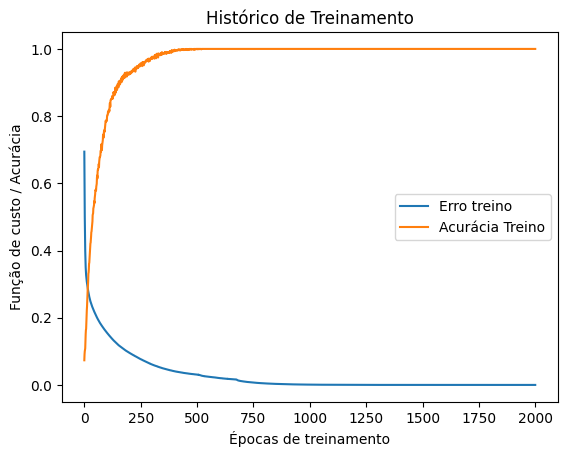

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Probabilidades Preditas:
 [[9.9999976e-01 0.0000000e+00 0.0000000e+00 3.1212810e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1683632e-04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.8133964e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.6993699e-08]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 4.9319243e-31 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.7011001e-07]
 [2.9013432e-08 0.0000000e+00 0.0000000e+00 7.0014685e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9977201e-01]
 [1.9039053e-08 0.0000000e+00 0.0000000e+00 5.3726795e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9900752e-01]]

Índices das Classes Preditas: [0 0 0 9 9 9 3 3 3 7 7 7 6 6 6 1 1 1 2 2 2 4 4 4 5 5 5 8 8 8]

Legenda das Classes: Index(['A+', 'C-', 'D+', 'B+', 'D-', 'E+', 'C+', 'B-', 'E-', 'A-'], dtype='object')

Classes P

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- DADOS DE TREINAMENTO ---

dados = pd.read_csv('/content/Hipertensao_Treinamento.txt', header=None)

# Separa as features (X, primeiras 13 colunas) e o alvo (Y, última coluna)
X_df = dados.iloc[:, 0:13]
Y_series = dados.iloc[:, 13]

# Converter colunas de texto em números
X_processado = X_df.copy()
mapeamento_features = {}

for col_idx in [1, 2, 3]:
    codigos, legenda = pd.factorize(X_df[col_idx])
    X_processado[col_idx] = codigos
    mapeamento_features[col_idx] = {texto: codigo for codigo, texto in enumerate(legenda)}


# Converte a coluna alvo (Y) de texto para números
Y_numerico, legenda_classes = pd.factorize(Y_series)
num_classes = len(legenda_classes)

# Normaliza os dados
scaler = StandardScaler()
X_final = scaler.fit_transform(X_processado)

# Transforma os dados
Y_one_hot = []
for i in range(len(Y_numerico)):
    linha = []
    for j in range(num_classes):
      if j == Y_numerico[i]:
        linha.append(1)
      else:
        linha.append(0)
    Y_one_hot.append(linha)

Y_final = np.array(Y_one_hot)


# --- MODELO E TREINAMENTO ---

modelo = Sequential()
modelo.add(Dense(32, input_dim=X_final.shape[1], activation='relu'))
# A camada de saída tem o número de neurônios igual ao número de classes
modelo.add(Dense(num_classes, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o Modelo
print("Iniciando o treinamento...")
resultado = modelo.fit(X_final, Y_final, batch_size=32, epochs=2000, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,336 (9.13 KB)

 Trainable params: 778 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,558 (6.09 KB)

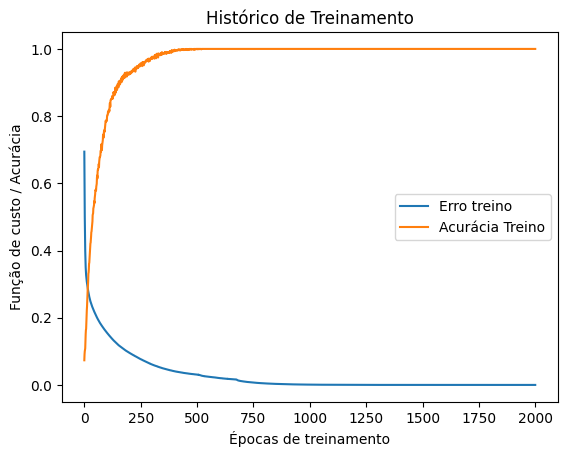

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Probabilidades Preditas:
 [[9.9999976e-01 0.0000000e+00 0.0000000e+00 3.1212810e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1683632e-04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.8133964e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.6993699e-08]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 4.9319243e-31 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.7011001e-07]
 [2.9013432e-08 0.0000000e+00 0.0000000e+00 7.0014685e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9977201e-01]
 [1.9039053e-08 0.0000000e+00 0.0000000e+00 5.3726795e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9900752e-01]]

Índices das Classes Preditas: [0 0 0 9 9 9 3 3 3 7 7 7 6 6 6 1 1 1 2 2 2 4 4 4 5 5 5 8 8 8]

Legenda das Classes: Index(['A+', 'C-', 'D+', 'B+', 'D-', 'E+', 'C+', 'B-', 'E-', 'A-'], dtype='object')

Classes P

In [4]:


# Mostra a rede
modelo.summary()


# Mostra o gráfico do histórico de treinamento
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo / Acurácia')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()


# --- DADOS DE TESTE E PREVISÃO ---

# Carrega conjunto de teste
testes = pd.read_csv('/content/Hipertensao_Teste.txt', header=None)

# Separa as features de teste
Xtestes_df = testes.iloc[:, 0:13]

# Conversão de  texto para número usada no treinamento
Xtestes_processado = Xtestes_df.copy()
for col_idx in [1, 2, 3]:
    mapa = mapeamento_features[col_idx]
    Xtestes_processado[col_idx] = Xtestes_df[col_idx].map(mapa).fillna(-1) # -1 para categorias não vistas

# Normaliza os dados de teste
Xtestes_final = scaler.transform(Xtestes_processado)

# Testa a rede
Y_predito_prob = modelo.predict(Xtestes_final)
print("\nProbabilidades Preditas:\n", Y_predito_prob[:5]) # Mostra as 5 primeiras

# Converte as previsões de volta para a classe original
# np.argmax é uma forma eficiente de fazer o que seu loop original fazia
indices_preditos = np.argmax(Y_predito_prob, axis=1)
classes_preditas = legenda_classes[indices_preditos]

print("\nÍndices das Classes Preditas:", indices_preditos)
print("\nLegenda das Classes:", legenda_classes)
print("\nClasses Preditas:\n", classes_preditas)


# Ver Resposta
Y_Resposta = pd.DataFrame(data=classes_preditas, columns=['Previsão de Classe'])
print("\nResposta Final:")
print(Y_Resposta)